In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import sklearn.ensemble as se
import sklearn.model_selection as ms
from sklearn.model_selection import KFold
import sklearn.metrics



In [175]:
df = pd.read_csv('OnlineNewsPopularity.csv', sep=', ', engine='python')

In [136]:
# see all columns
pd.set_option('display.max_columns', None)

In [137]:
# df.info()
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [138]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# EDA

In [139]:
df.isna().sum()
# see if there are any missing values
df.isnull().values.any()

False

In [162]:
# target analysis
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

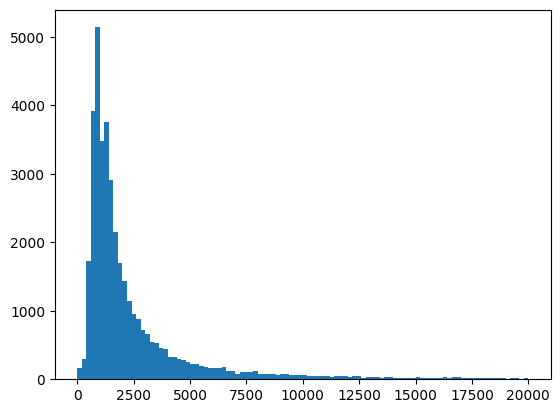

In [169]:
plt.hist(df['shares'], bins=100, range=(0, 20000))
plt.show()

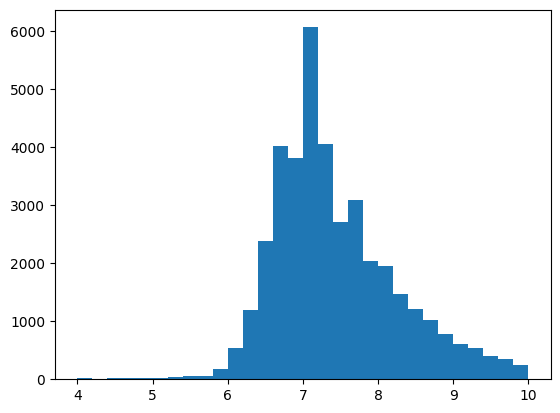

In [171]:
plt.hist(np.log(df['shares']), bins=30, range=(4,10))
plt.show()

C:\Users\tingf\AppData\Local\Temp\ipykernel_13396\812613990.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

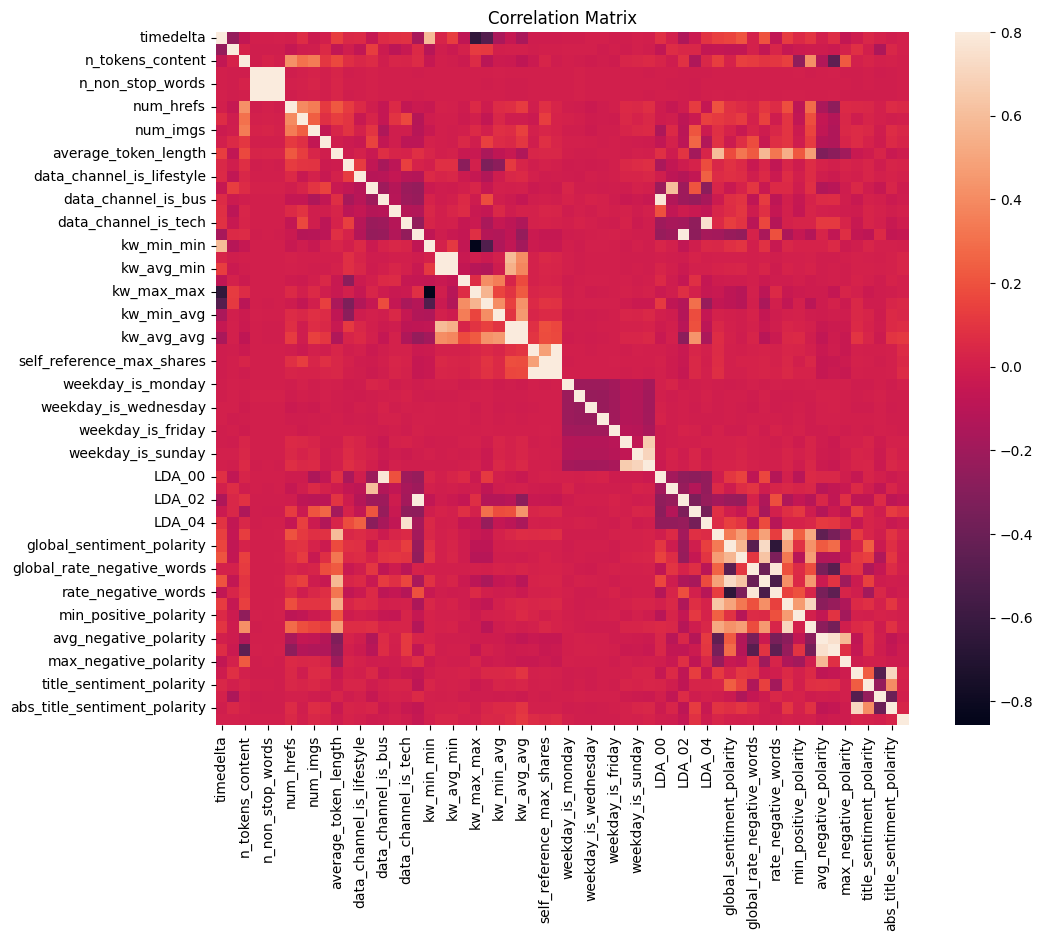

In [140]:
# coreelation matrix
plt.figure(figsize=(12,9))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.title('Correlation Matrix')

<AxesSubplot: >

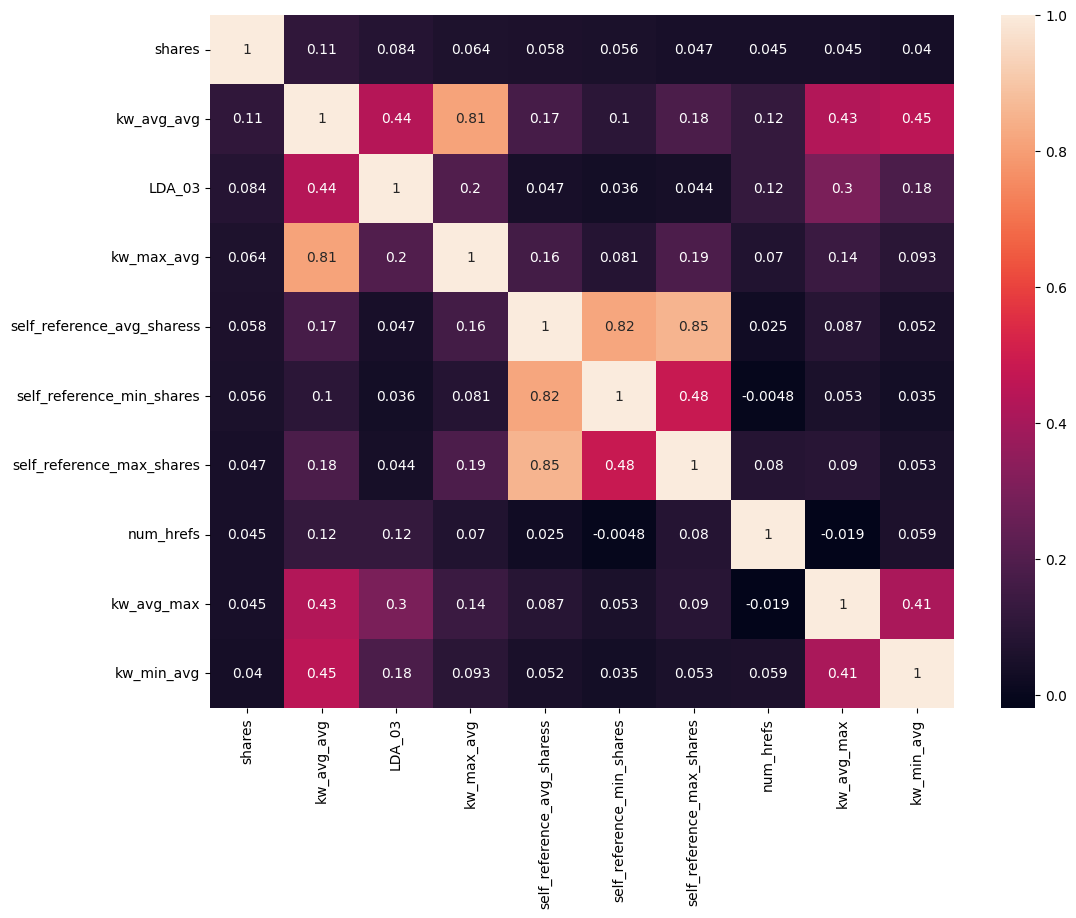

In [141]:
# select top 10 correlated features
k = 10
col_10 = corr_matrix.nlargest(k, 'shares')['shares'].index
corr10_df = df[col_10]
plt.figure(figsize=(12, 9))
sns.heatmap(corr10_df.corr(), annot=True)


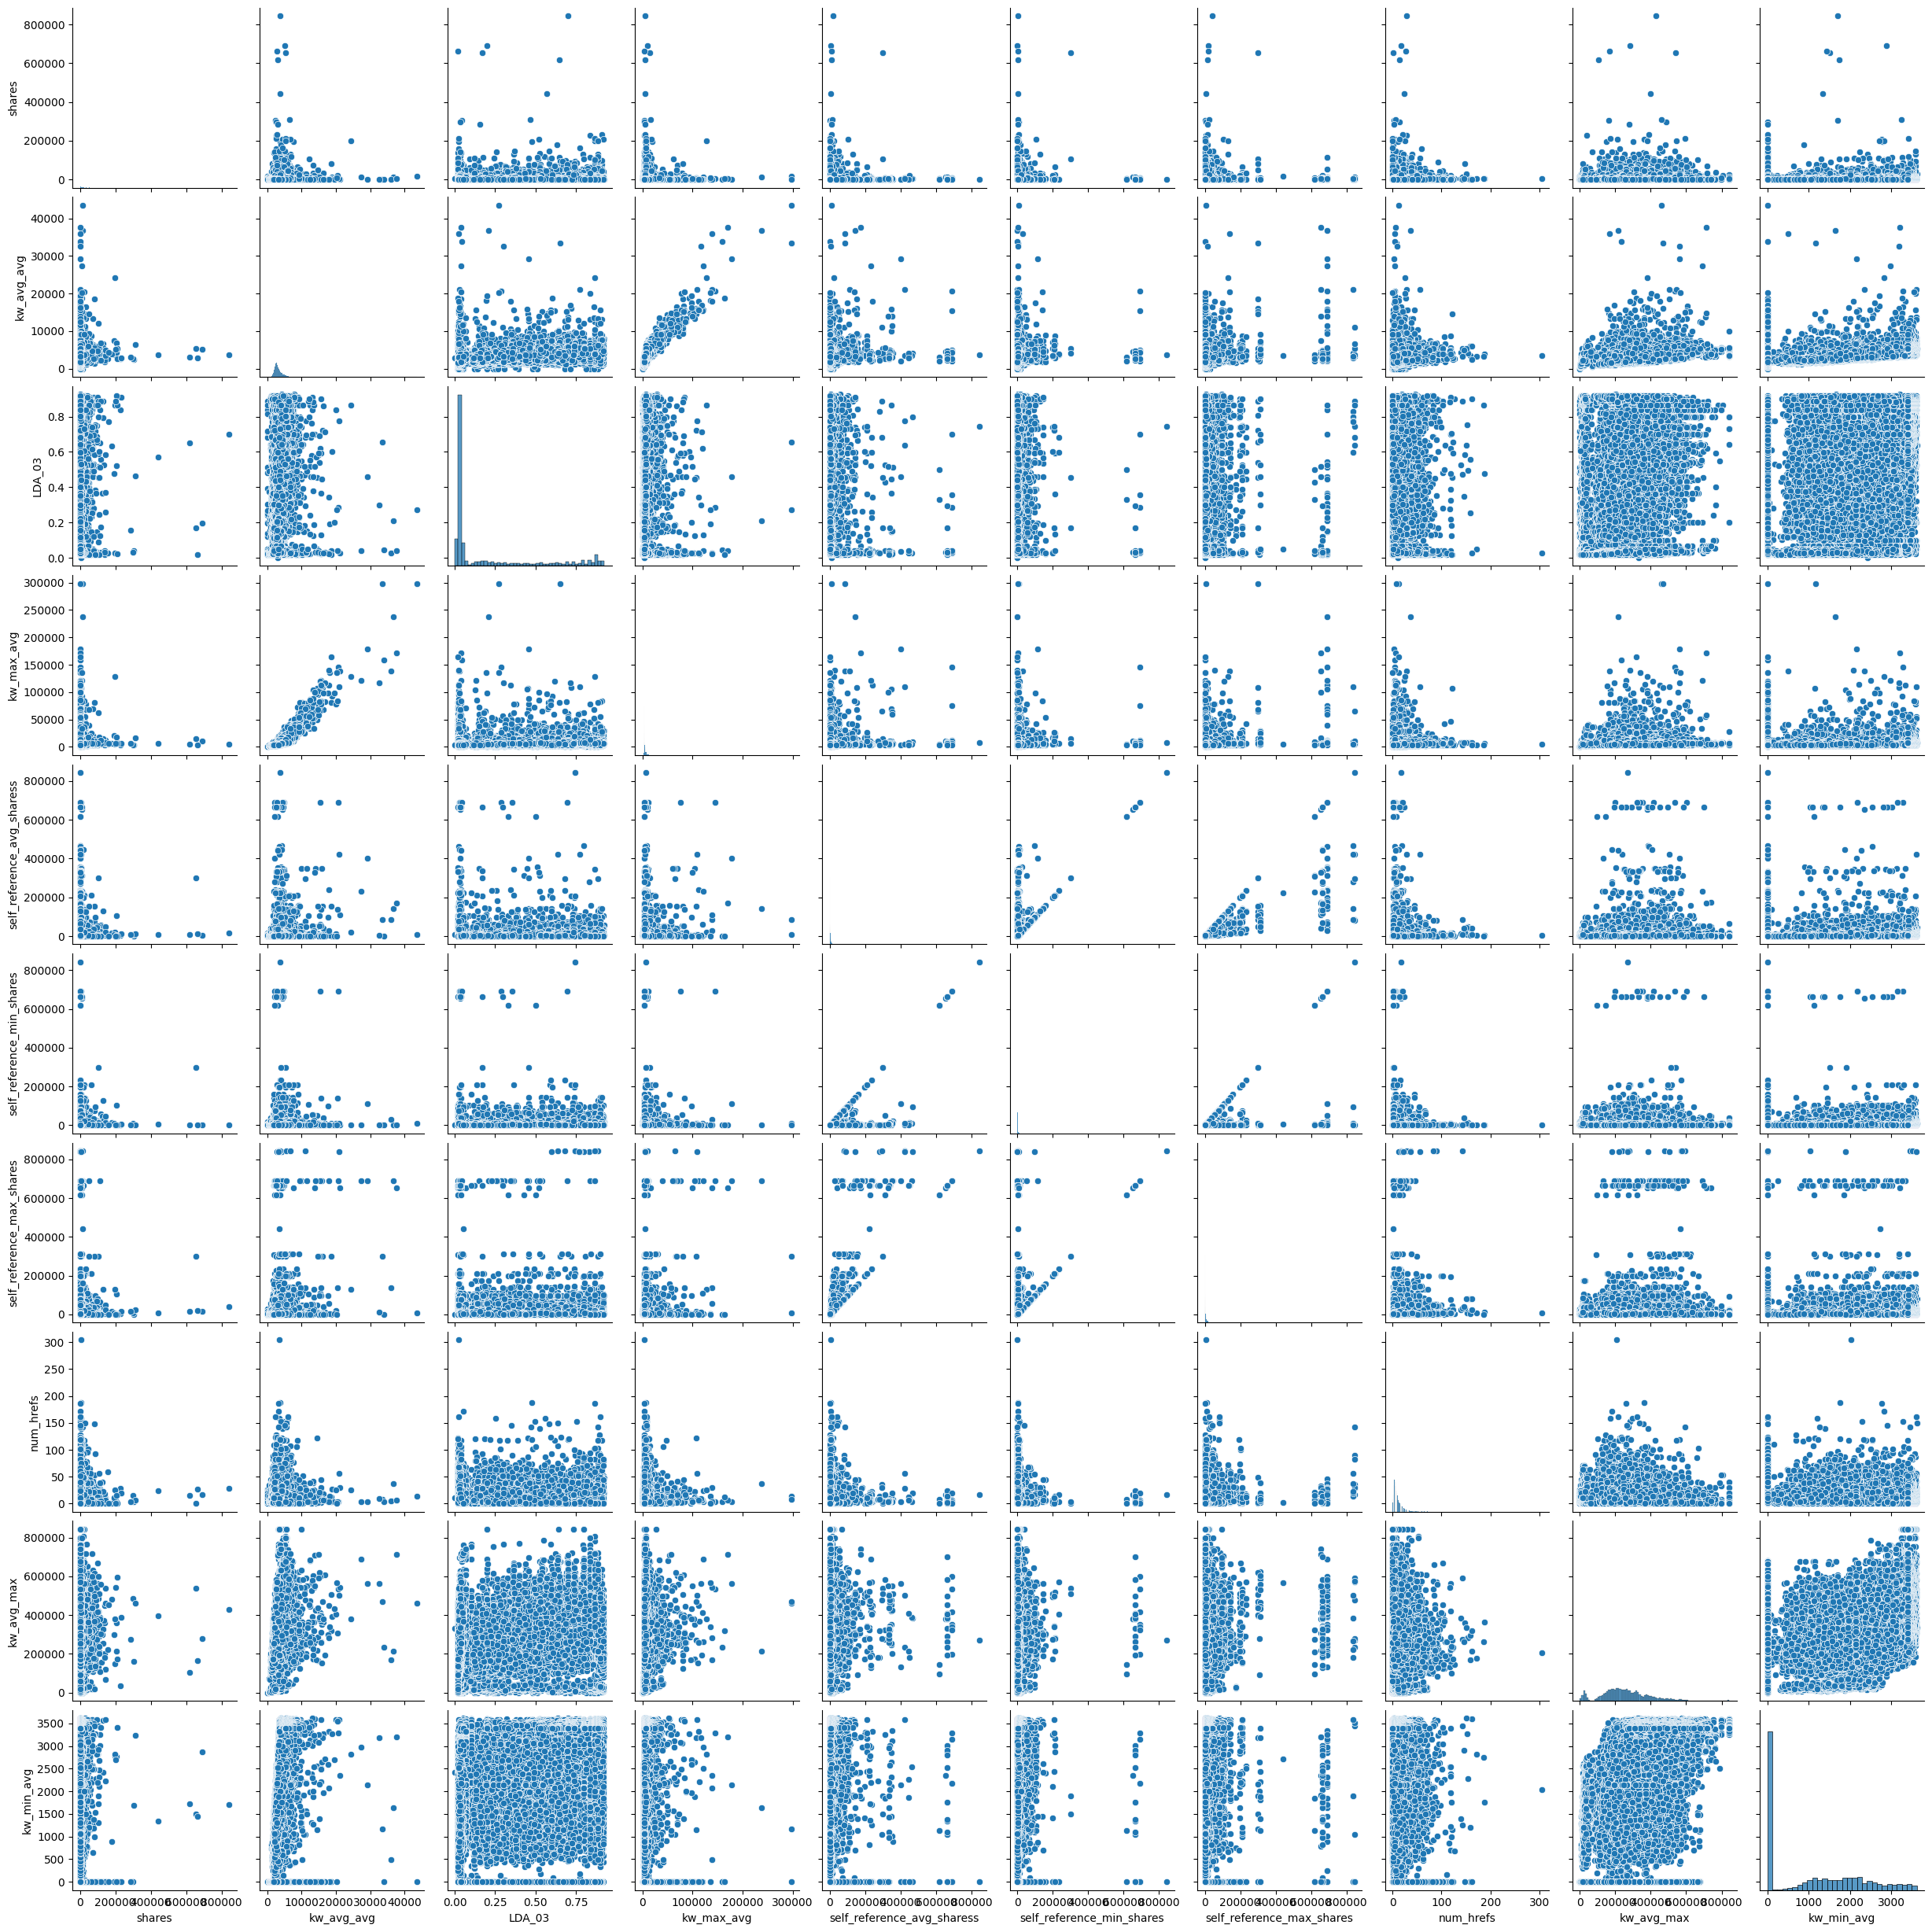

In [142]:
sns.pairplot(df[col_10], height=2.5)

In [143]:
# Shares Value Range:   Number of Instances in Range:
#    <  1400            18490
#    >= 1400            21154

df['popularity'] = df['shares'].apply(lambda x: 1 if x > 1400 else 0)


In [144]:
df.popularity.value_counts(normalize=True)

0    0.506558
1    0.493442
Name: popularity, dtype: float64

In [145]:
col_10

Index(['shares', 'kw_avg_avg', 'LDA_03', 'kw_max_avg',
       'self_reference_avg_sharess', 'self_reference_min_shares',
       'self_reference_max_shares', 'num_hrefs', 'kw_avg_max', 'kw_min_avg'],
      dtype='object')

In [146]:
df.pivot_table(index='popularity', values=col_10, aggfunc='mean')

,LDA_03,kw_avg_avg,kw_avg_max,kw_max_avg,kw_min_avg,num_hrefs,self_reference_avg_sharess,self_reference_max_shares,self_reference_min_shares,shares
popularity,,,,,,,,,,
0,0.205707,2925.029644,257074.251864,5207.127857,1013.432574,9.895429,4890.604678,7955.710894,2991.107577,948.374465
1,0.242312,3352.291922,261548.309345,6119.258626,1223.617588,11.898221,7952.958578,12765.807207,5033.188659,5907.432573


In [147]:
# df.is_weekend.value_counts()
df.pivot_table(index='is_weekend', values='popularity')

,popularity
is_weekend,
0.0,0.466738
1.0,0.670713


In [148]:
df.pivot_table(index='data_channel_is_bus', values='popularity')

,popularity
data_channel_is_bus,
0.0,0.495208
1.0,0.484020


<AxesSubplot: xlabel='LDA_03', ylabel='shares'>

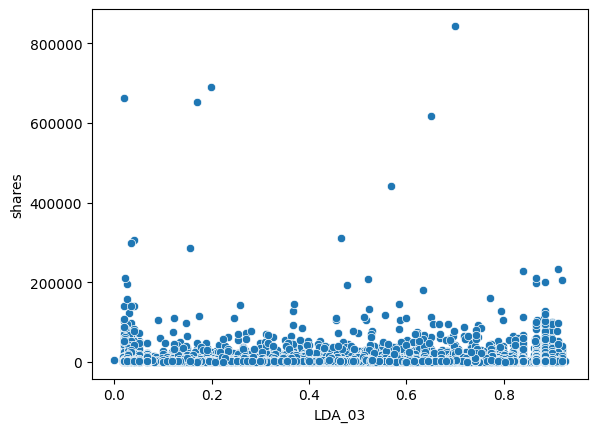

In [149]:
sns.scatterplot(data=df, x='LDA_03', y='shares')

It seems there is no strong correlation between LDA03 and the target variable. 

<AxesSubplot: xlabel='num_hrefs', ylabel='shares'>

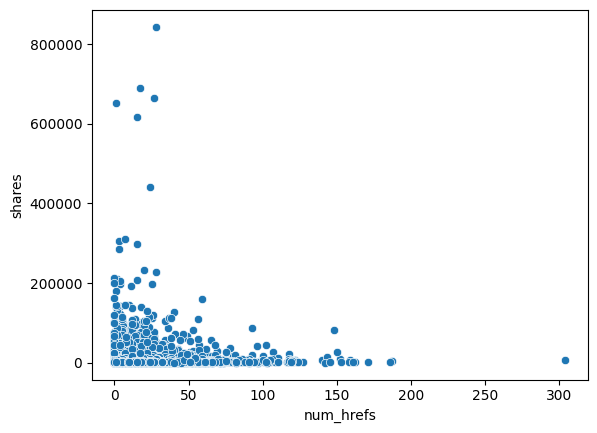

In [150]:
sns.scatterplot(data=df, x='num_hrefs', y='shares')

<AxesSubplot: xlabel='global_sentiment_polarity', ylabel='shares'>

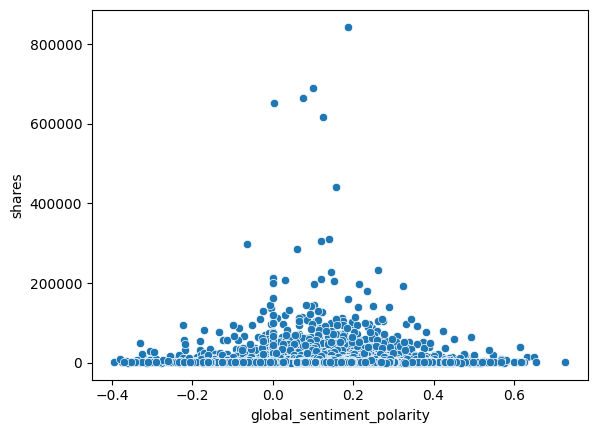

In [151]:
sns.scatterplot(data=df, x='global_sentiment_polarity', y='shares')

interest to see the global_sentiment_polarity bewteen the 0.0 and 0.2 are more likely to get a higher target value.

In [152]:
df_grouped = df.groupby("popularity").sum()

C:\Users\tingf\AppData\Local\Temp\ipykernel_13396\1465220289.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [154]:
df_channel = df_grouped.filter(regex='data_channel')
# df_channel.plot(kind='bar', figsize=(12, 9))
px.bar(df_channel, x=df_channel.index, y=df_channel.columns)

Among the popularity channel, tech channel has the highest popularity, it is followed by entertainment and business channel, but we need to pay attention to the amount of the samples for each channel. Overral, we assume that socmed channel has the tendancy to gain the popularity.

<AxesSubplot: xlabel='num_hrefs', ylabel='shares'>

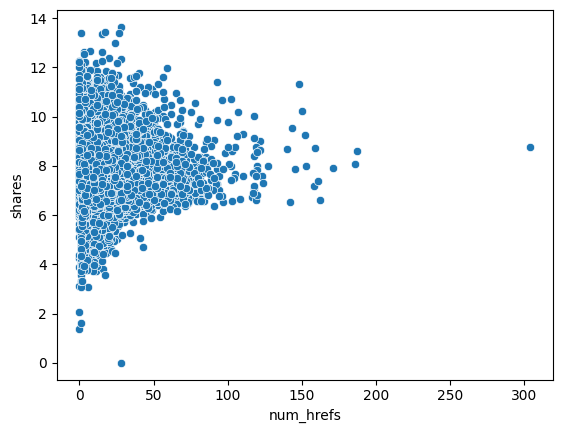

In [155]:
# make clear version for num_hrefs
sns.scatterplot(x=df['num_hrefs'], y=np.log(df['shares']))

We observe that as the increase of number of links, the popularity is decreasing. 

# Feature Engineering

In [389]:
df_clean = df.copy()

In [390]:
# remove useless columns
df_clean.drop(['url', 'timedelta'], axis=1, inplace=True)

In [391]:
print(df.shape)
print(df_clean.shape)

(39644, 61)
(39644, 59)


In [392]:
# check the duplicates
df_clean.duplicated().sum()

0

In [393]:
# deal with the outliers for num_hrefs > 250
df_clean = df_clean[df_clean['num_hrefs'] < 250]

In [394]:
# df_clean['shares'] = df_clean['shares'].apply(lambda x: np.log(x+1))

In [395]:
df_clean['shares'].describe()

count     39643.000000
mean       3395.301869
std       11627.086941
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [396]:
# select top 10 correlated features
# df_clean = df_clean[col_10]

# Build Model

In [397]:
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.ensemble as se
import sklearn.metrics as sm

In [414]:
# scale the data

def scale_data(df, scaler):
    scaled_arr = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled_arr, columns=df.columns)
    return df_scaled


In [415]:
# split data into train and test
def train_test_split(df):
    X = df.drop('shares', axis=1)
    y = df['shares']
    X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test



In [416]:
def evaluation_model(y_test, predictions):
    score = {'MAE': sm.mean_absolute_error(y_test, predictions), 
    'MSE':sm.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(sm.mean_squared_error(y_test, predictions))}
    return score
    # print('R2:', sklearn.metrics.r2_score(y_test, predictions))

In [417]:
df_clean.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Firsts Model - Linear Regression

In [418]:
sc = sp.MinMaxScaler()
# sc = sp.StandardScaler() # target variable is normalized
# sc = sp.RobustScaler()
df_scaled = scale_data(df_clean, sc)

In [420]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled)

In [421]:
reg = lm.LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
evaluation_model(y_test, predictions)


{'MAE': 0.003622635852482488,
 'MSE': 0.00024153876748953803,
 'RMSE': 0.015541517541396594}

In [422]:
print({'LinearRegression': evaluation_model(y_test, predictions)})

{'LinearRegression': {'MAE': 0.003622635852482488, 'MSE': 0.00024153876748953803, 'RMSE': 0.015541517541396594}}


## Second Model - Random Forest

In [430]:
# buil the model ForestRegressor
def build_model(df_scaled):
    rf = se.RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(df_scaled)
    rf.fit(X_train, y_train)
    # predictions = np.exp(rf.predict(X_test))
    # target = np.exp(y_test)
    predictions = rf.predict(X_test)
    target = y_test
    return rf, target, predictions



In [431]:
rf, target, predictions = build_model(df_scaled)

In [432]:

print({'RandomForestRegressor': evaluation_model(target, predictions)})

{'RandomForestRegressor': {'MAE': 0.003633116477969703, 'MSE': 0.00024274093554975458, 'RMSE': 0.015580145556115789}}


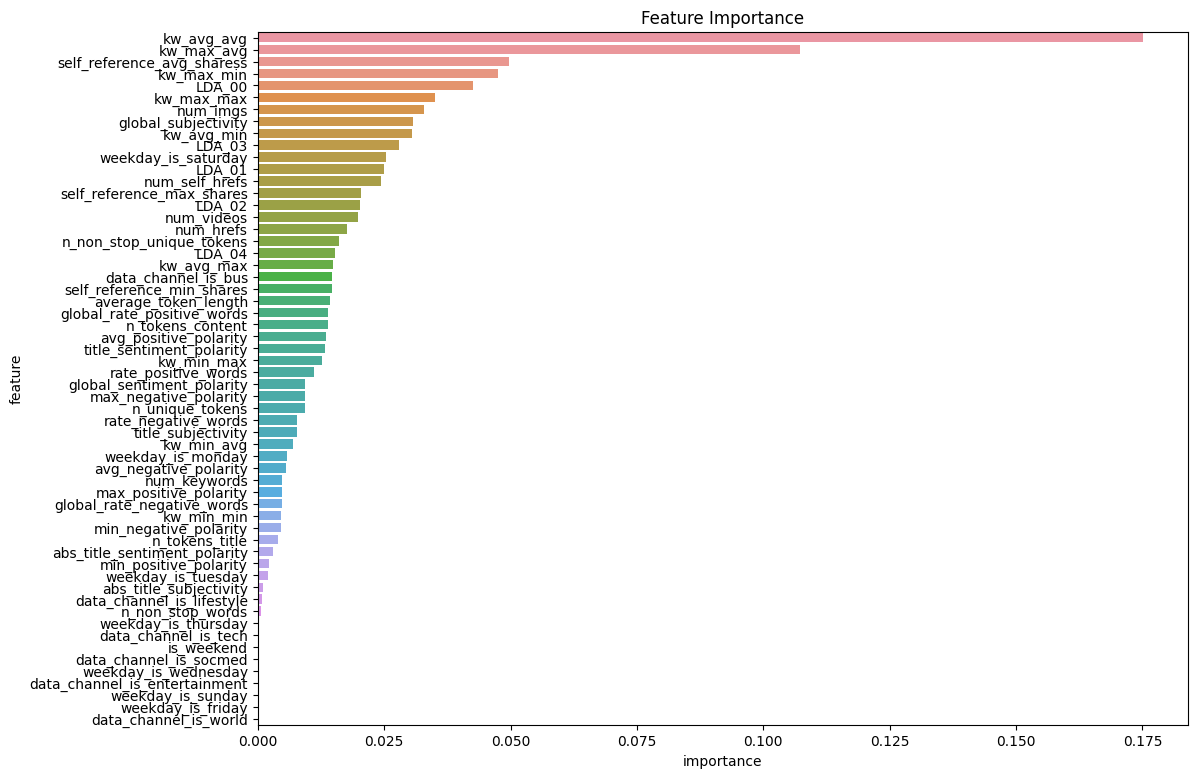

In [315]:
#  plot the feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance':rf.feature_importances_})
feature_importance.sort_values('importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 9))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


We will focus only on top 20 features.

<AxesSubplot: >

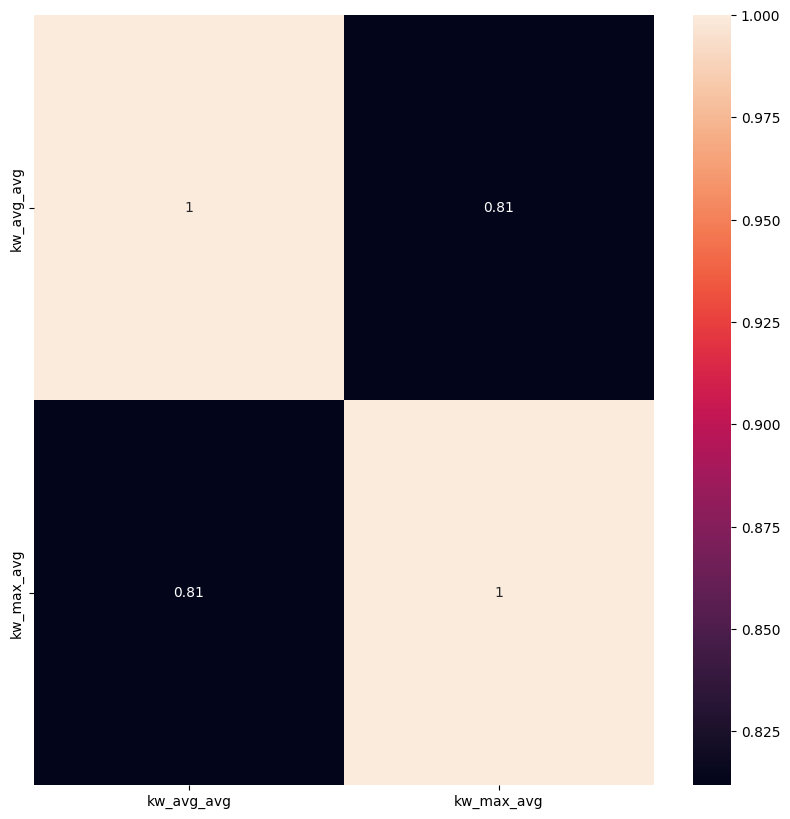

In [317]:
# Compute correlation between kw_avg_avg and kw_max_avg
corr = df_clean[['kw_avg_avg', 'kw_max_avg']].corr()
# Show the correlation
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

Kw max avg is highly correlated with kw avg avg, so we will remove kw max avg 

<AxesSubplot: >

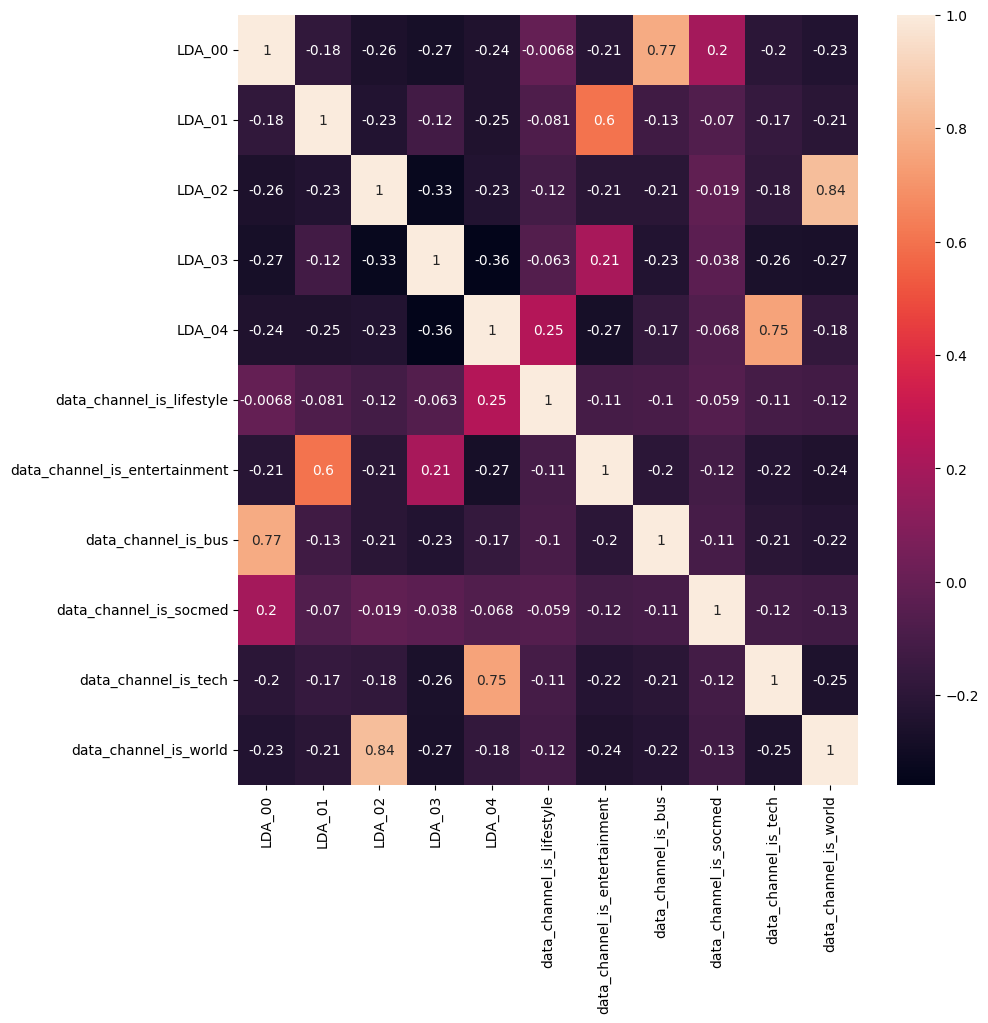

In [319]:
# Compute correlation between LDAs and channel since they are highly correlated
corr = df_clean[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']].corr()
figure = plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

LDA is not as much explainable than plain features, and each one is highly correlated to a channel feature. We remove LDA from our scope

<AxesSubplot: >

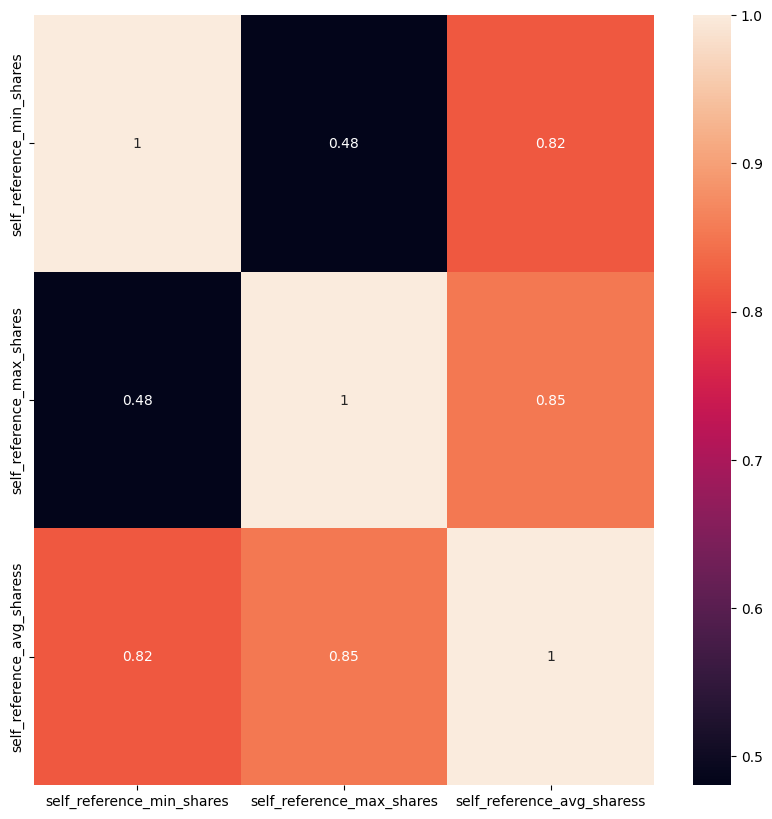

In [330]:
# compute correlation between self reference min shre and self reference max share
# corr = df[['self_reference_min_shares', 'self_reference_max_shares']].corr()
col_share = df_clean.filter(regex='self_reference').columns
corr = df[col_share].corr()
figure = plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

<AxesSubplot: >

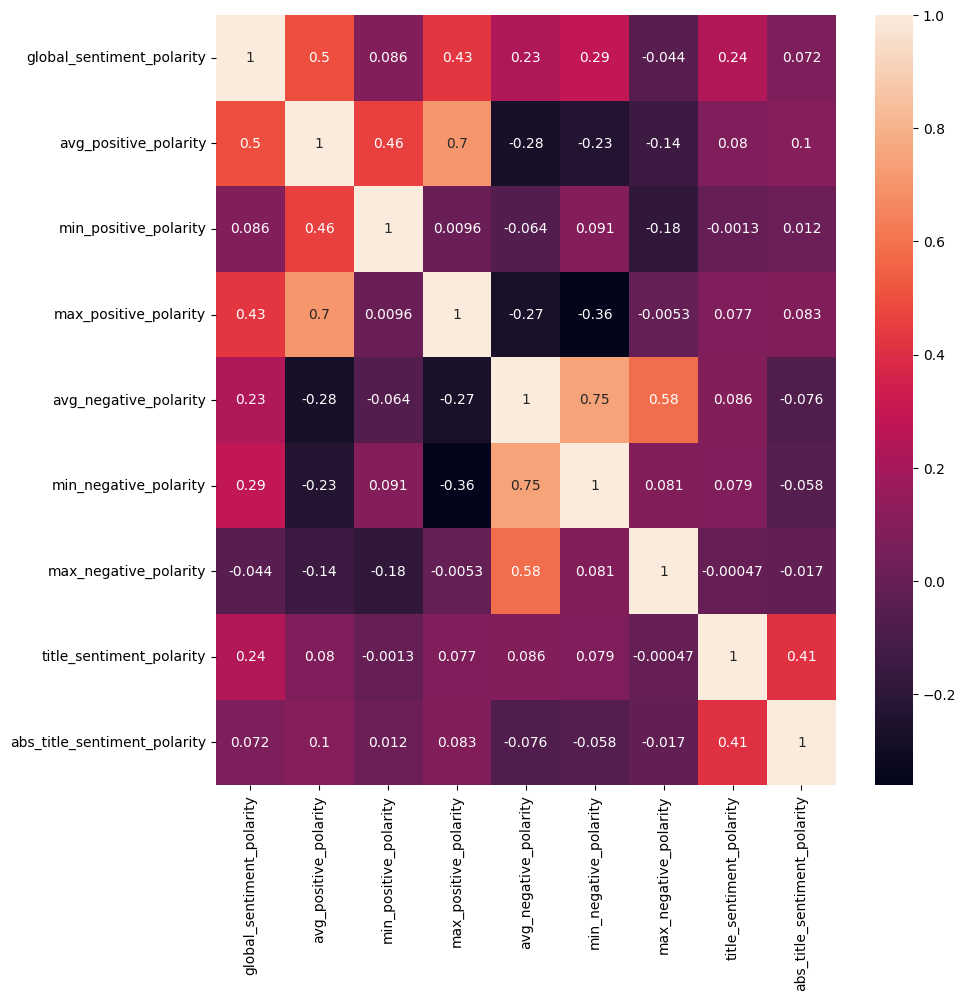

In [325]:
# compute correlation between positive and negative polarity
corr = df_clean.filter(regex='polarity').corr()
figure = plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

<AxesSubplot: >

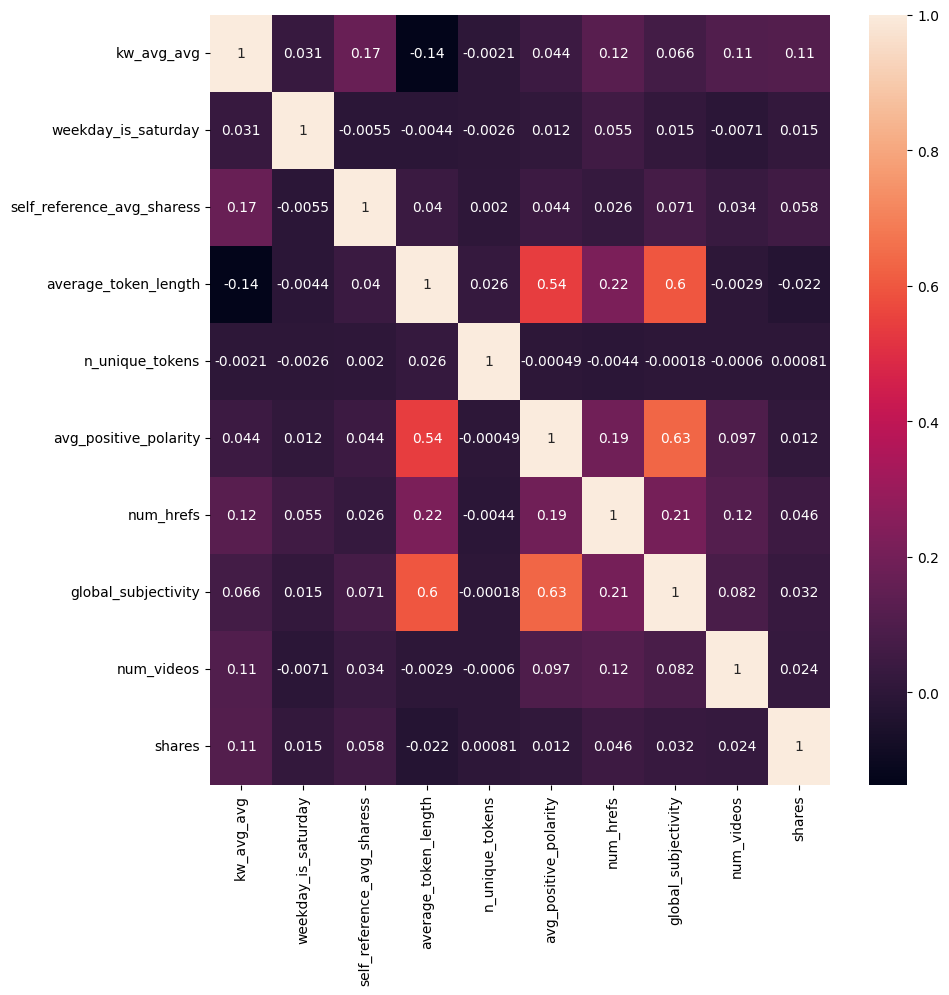

In [327]:
important_features = ['kw_avg_avg','weekday_is_saturday', 'self_reference_avg_sharess', 'average_token_length', 
                      'n_unique_tokens', 'avg_positive_polarity', 'num_hrefs', 'global_subjectivity', 'num_videos']

# Compute correlation between important features + shares

corr = df_clean[important_features + ['shares']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

### Second train model with important features - Random Forest

In [424]:
df_clean = df_clean[important_features + ['shares']]
df_clean.head()

,kw_avg_avg,weekday_is_saturday,self_reference_avg_sharess,average_token_length,n_unique_tokens,avg_positive_polarity,num_hrefs,global_subjectivity,num_videos,shares
0,0.0,0.0,496.000000,4.680365,0.663594,0.378636,4.0,0.521617,0.0,593
1,0.0,0.0,0.000000,4.913725,0.604743,0.286915,3.0,0.341246,0.0,711
2,0.0,0.0,918.000000,4.393365,0.575130,0.495833,3.0,0.702222,0.0,1500
3,0.0,0.0,0.000000,4.404896,0.503788,0.385965,9.0,0.429850,0.0,1200
4,0.0,0.0,3151.157895,4.682836,0.415646,0.411127,19.0,0.513502,0.0,505


In [433]:
df_scaled = scale_data(df_clean, sc)
df_scaled_features = df_scaled[important_features + ['shares']]
rf, target, predictions = build_model(df_scaled_features)
print({'RandomForestRegressor': evaluation_model(target, predictions)})

{'RandomForestRegressor': {'MAE': 0.003617876030769785, 'MSE': 0.00024390045677023938, 'RMSE': 0.01561731272563367}}


# Third Model - GBDT

In [435]:
gldt = se.GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_scaled_features)
gldt.fit(X_train, y_train)
predictions = gldt.predict(X_test)
evaluation_model(y_test, predictions)
print({'GradientBoostingRegressor': evaluation_model(y_test, predictions)})


{'GradientBoostingRegressor': {'MAE': 0.0036467762741954866, 'MSE': 0.00024447518160201025, 'RMSE': 0.01563570214611452}}
